# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv('insurance (1) (1).csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

,0
age,47
sex,2
bmi,275
children,6
smoker,2
region,4
expenses,1337


# EDA - Exploratory Data Analysis

In [14]:
numeric_cols = ['age','bmi','children','expenses']

## Bar plot

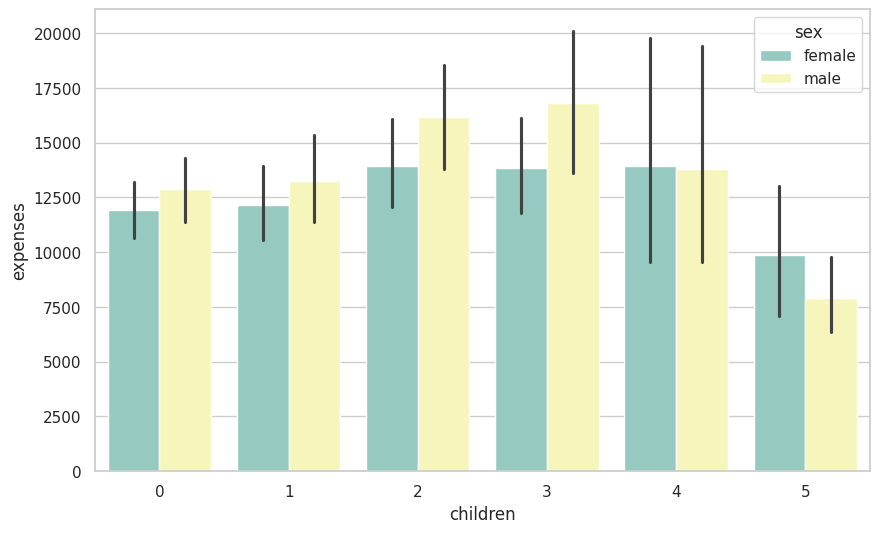

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='children',y='expenses',data=df,hue='sex',palette=['#8dd3c7','#ffffb3'])
plt.show()

The bar plot visualizes the relationship between the number of children (x-axis) and the medical expenses (y-axis) for males and females (hue) in the dataset. Each bar represents the average medical expenses for a given number of children, split by sex. The use of the 'rocket' palette provides a color gradient that distinguishes between the two sexes.

## Count plot

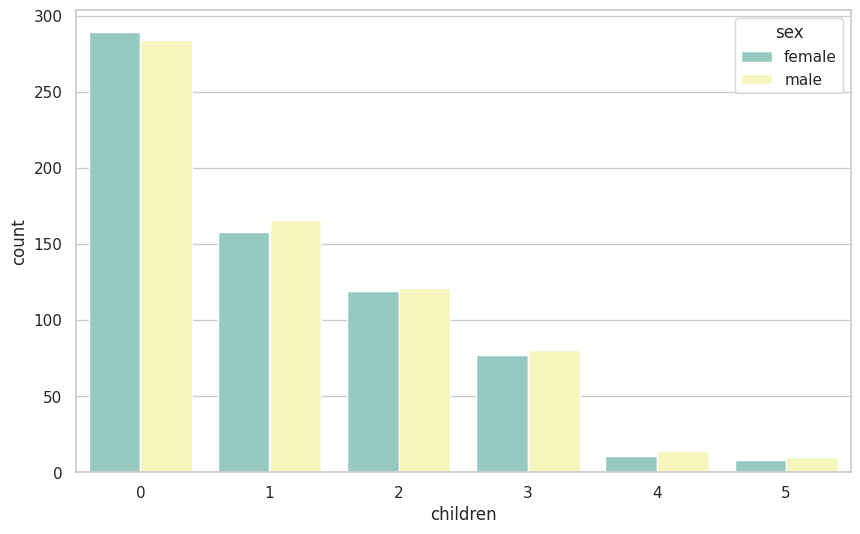

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='children',data=df,hue='sex',palette=['#8dd3c7','#ffffb3'])
plt.show()

## Scatter plot

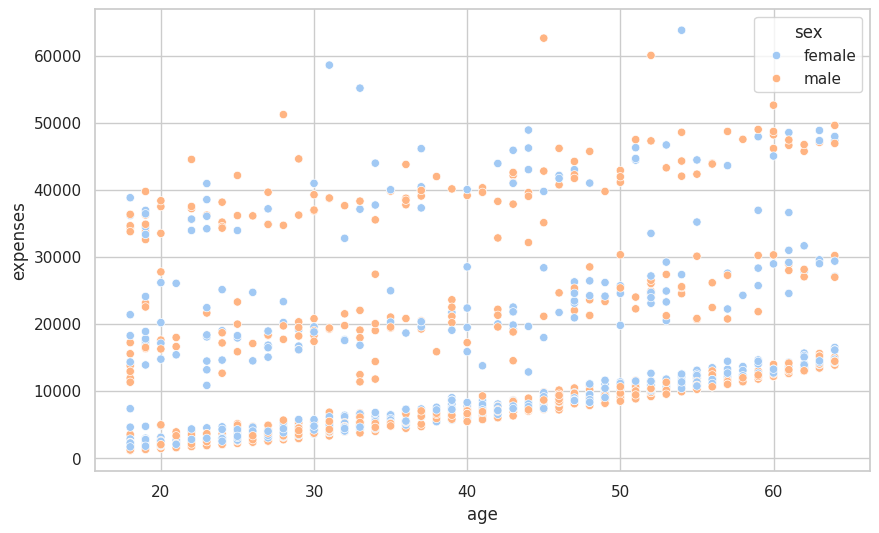

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='expenses',data=df,hue='sex',palette='pastel')
plt.show()

## Pair plot

<Figure size 1000x600 with 0 Axes>

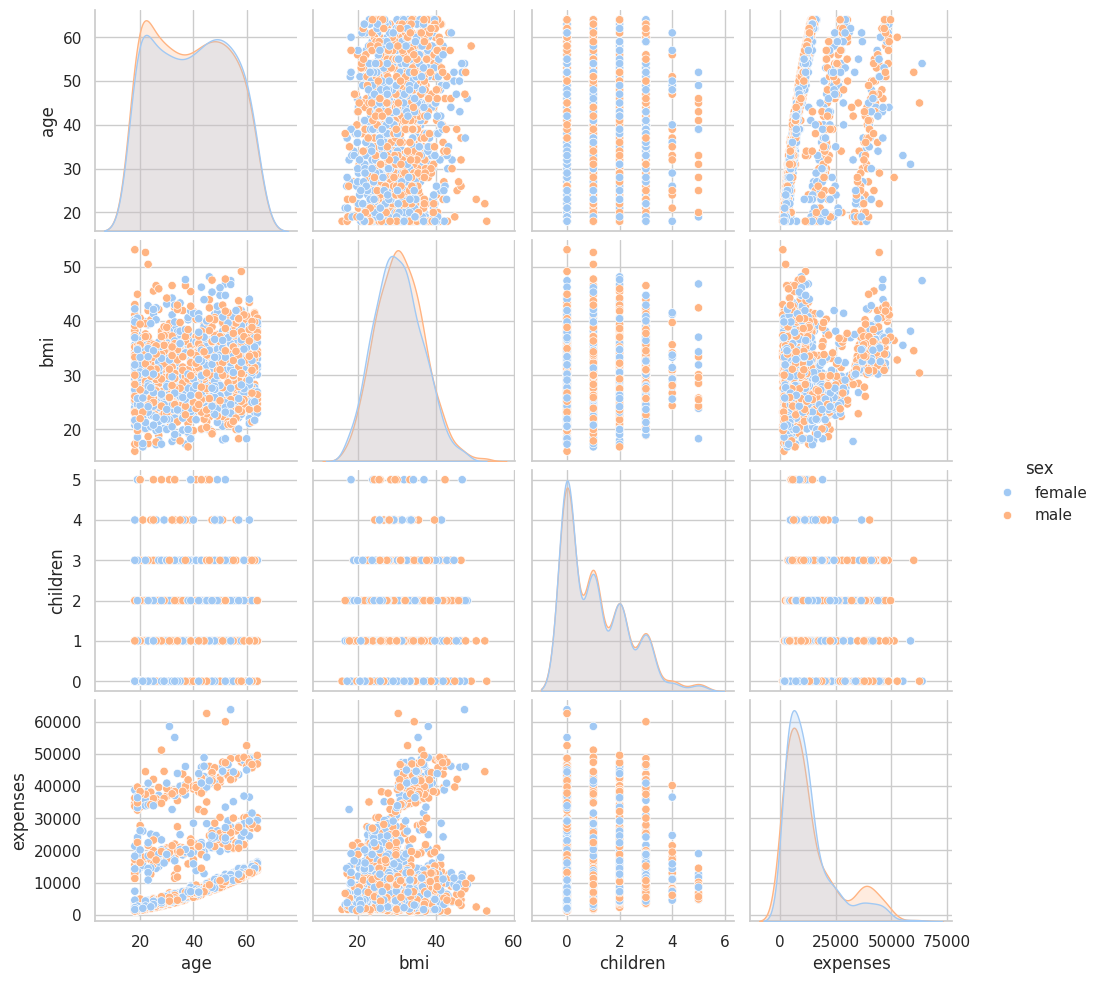

In [18]:
plt.figure(figsize=(10,6))
sns.pairplot(df,hue='sex',palette='pastel')
plt.show()

## Box plot

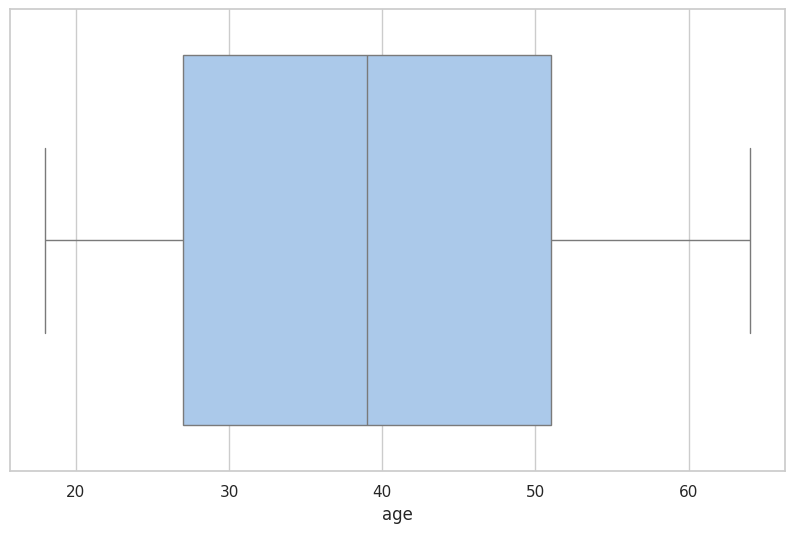

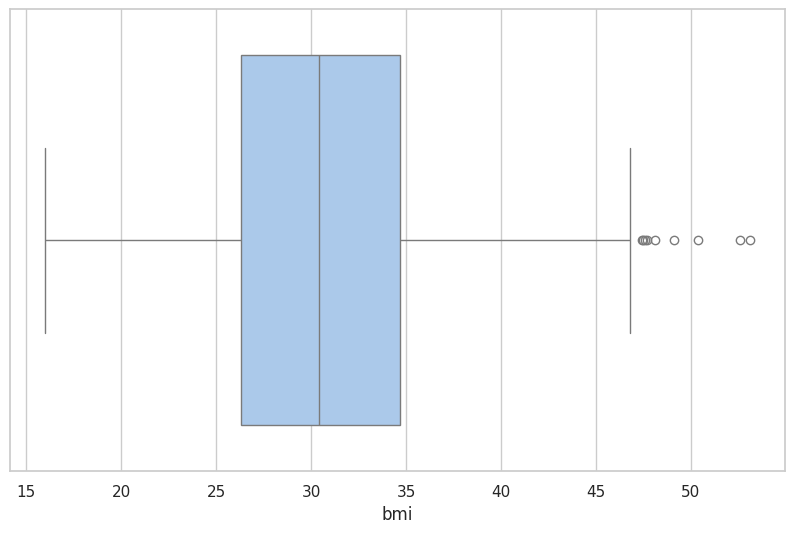

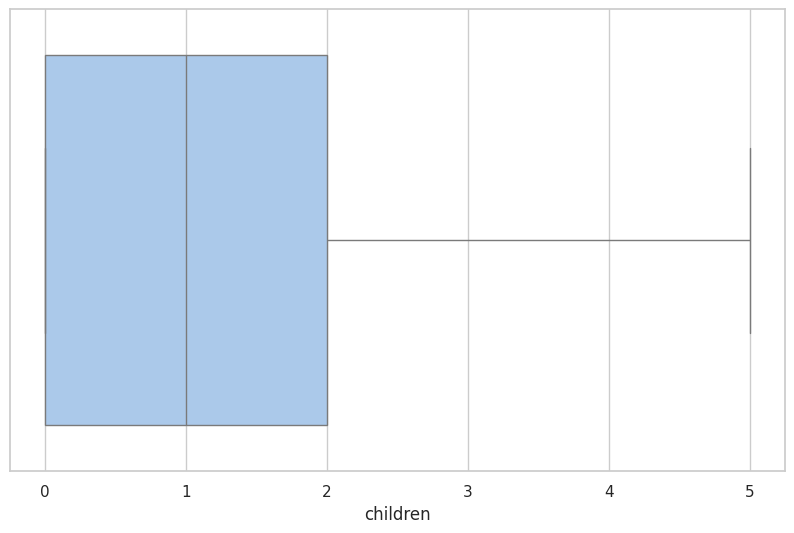

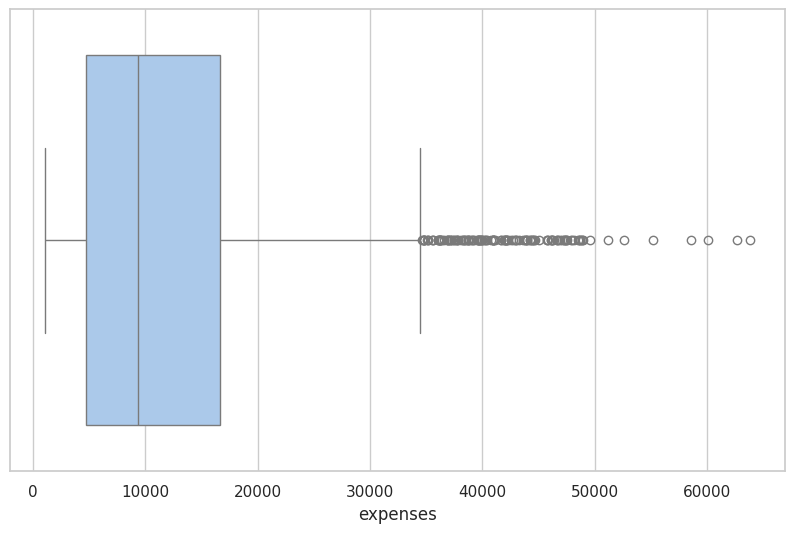

In [19]:
for i,col in enumerate(numeric_cols):
  plt.figure(figsize=(10,6))
  sns.boxplot(x=col,data=df,palette='pastel')
  plt.xlabel(col)
  plt.show()

## Iqr method

In [20]:
for col in numeric_cols:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

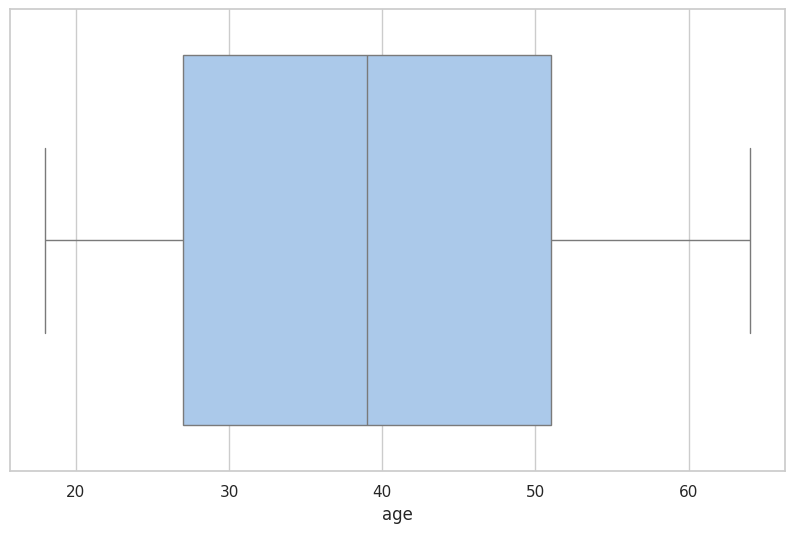

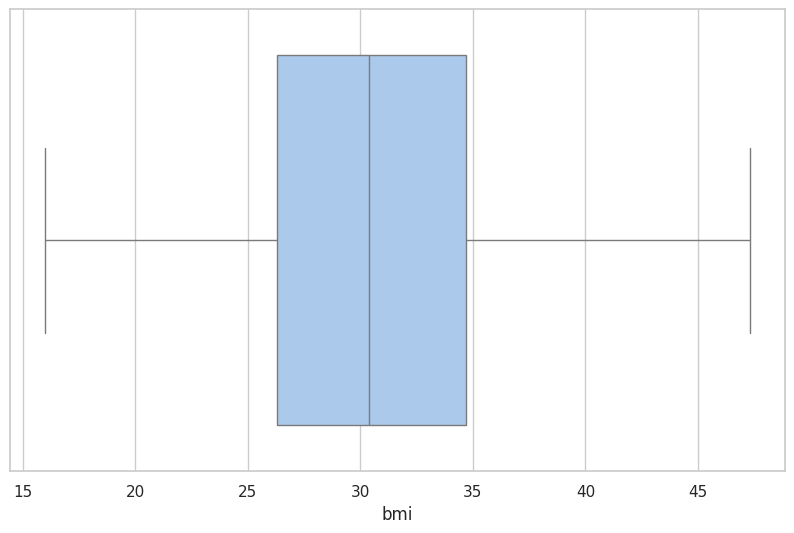

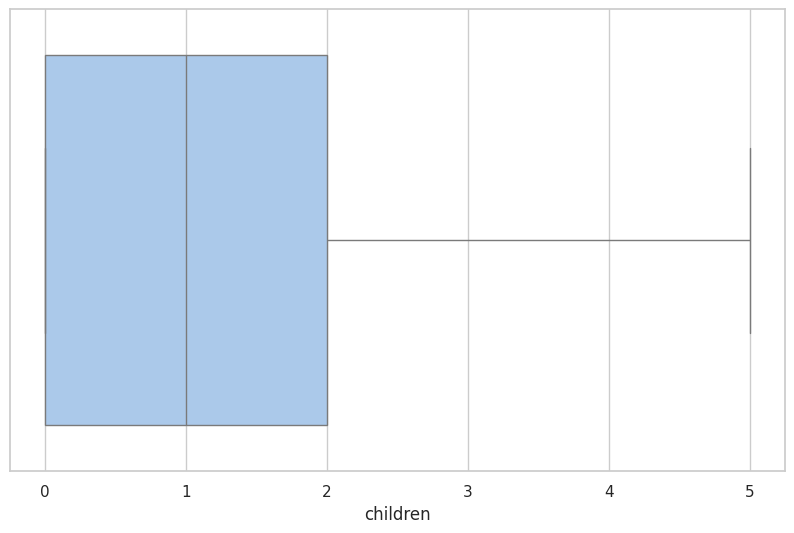

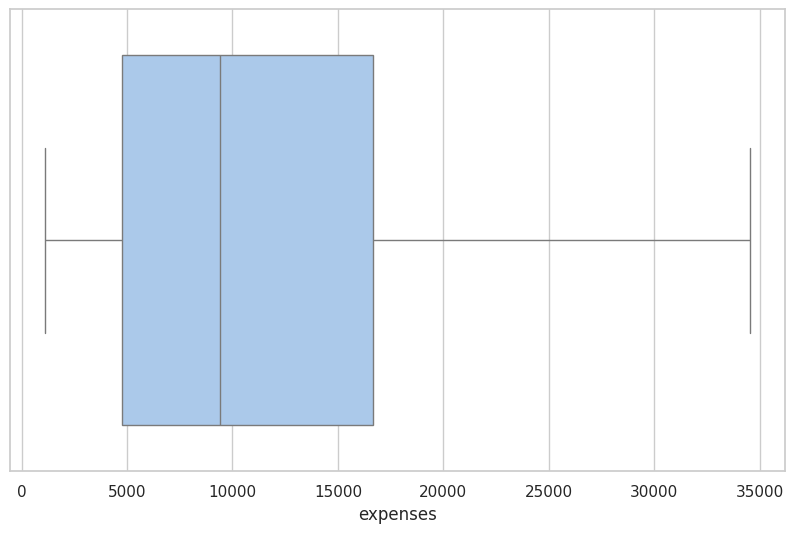

In [21]:
for i,col in enumerate(numeric_cols):
  plt.figure(figsize=(10,6))
  sns.boxplot(x=col,data=df,palette='pastel')
  plt.xlabel(col)
  plt.show()

## Hist plot

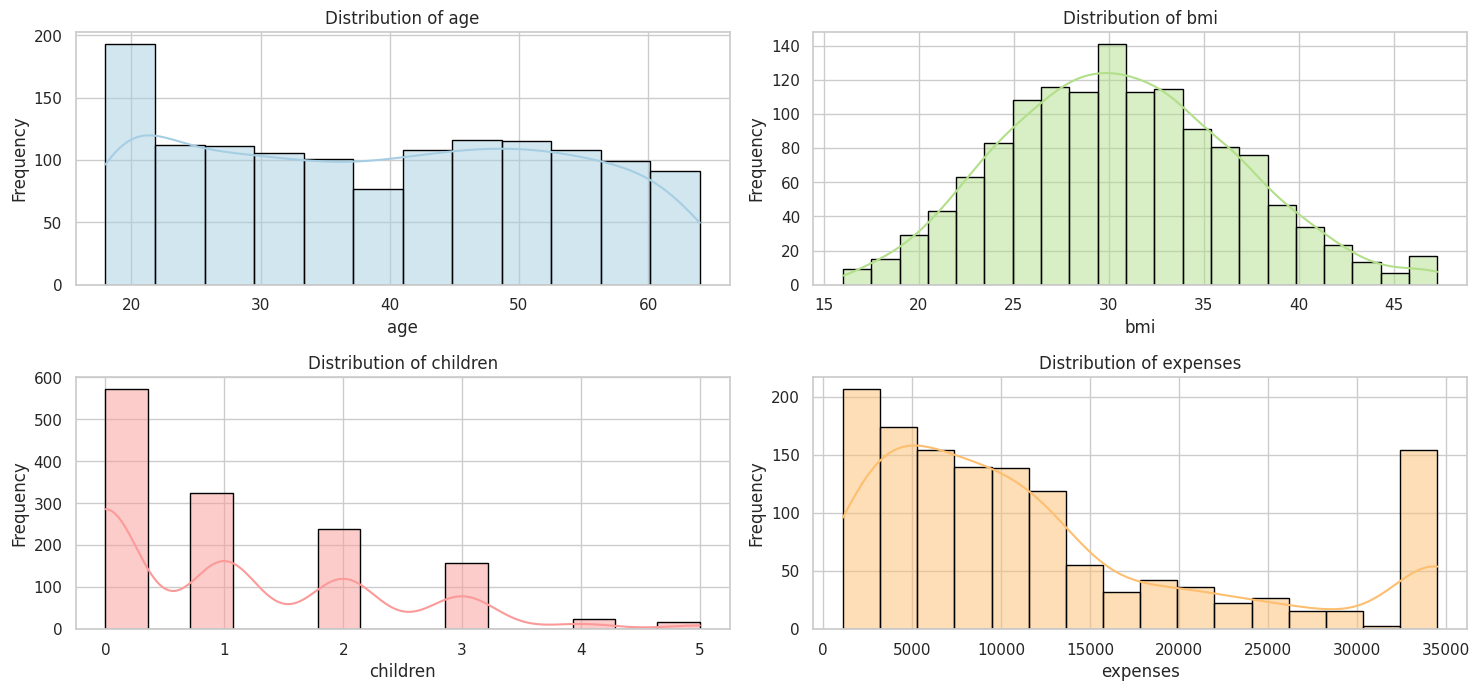

In [22]:
plt.figure(figsize=(15,10))
colors = ['#a6cee3','#b2df8a','#fb9a99','#fdbf6f']
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col], kde=True, color=colors[i], edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Violin plot

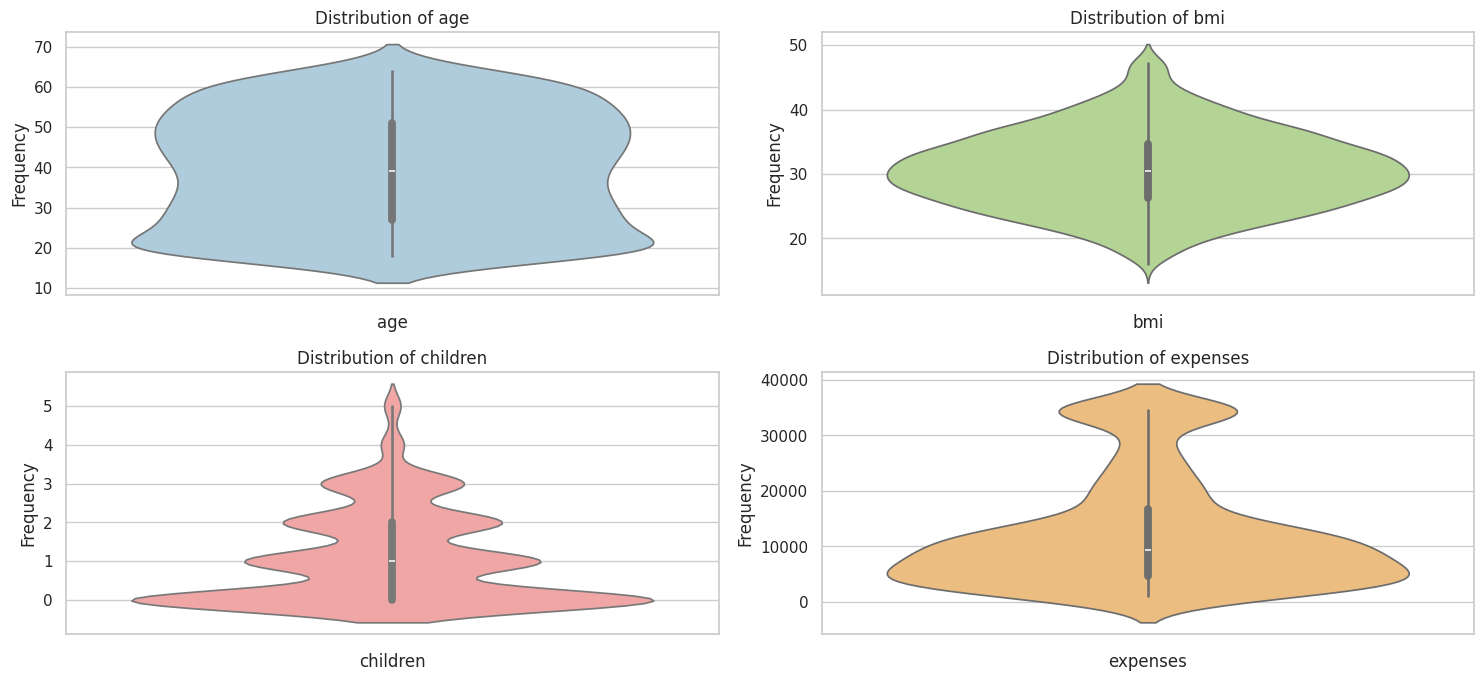

In [23]:
plt.figure(figsize=(15,10)) # Define figure once

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1) # Adjusted to fit  subplots
    sns.violinplot(df[col], color=colors[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout() # Prevent overlap
plt.show()

In [24]:
corr=df[['age','bmi','children','expenses']].corr()
print("\033[32m"+f"{corr}"+"\033[5m")

               age       bmi  children  expenses
age       1.000000  0.112074  0.041536  0.312423
bmi       0.112074  1.000000  0.013578  0.161398
children  0.041536  0.013578  1.000000  0.072372
expenses  0.312423  0.161398  0.072372  1.000000


## Heatmap

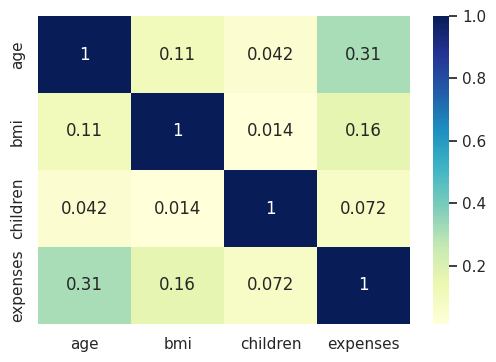

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

## Libraries

In [26]:
# importing the needed libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Encode Categorical Variables

In [27]:
# Create encoder instance
le = LabelEncoder()

# Apply to each column
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

display(df)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


## Outlier Treatment (IQR)

In [28]:
for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    df[col] = df[col].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

## Features & Target

In [29]:
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models & Hyperparameters

In [30]:
models_params = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'model__alpha':[0.1,1,10]}),
    'Lasso': (Lasso(), {'model__alpha':[0.001,0.01,0.1]}),
    'ElasticNet': (ElasticNet(), {'model__alpha':[0.001,0.01,0.1], 'model__l1_ratio':[0.3,0.5,0.7]}),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {'model__max_depth':[3,5,7]}),
    'Random Forest': (RandomForestRegressor(random_state=42), {'model__n_estimators':[100,200], 'model__max_depth':[5,7]}),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), {'model__n_estimators':[100,200], 'model__learning_rate':[0.05,0.1]})
}

## Training, Tuning & Evaluation

In [31]:
results = []
best_models = {}

for name, (model, params) in models_params.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)]) if name in ['Linear Regression','Ridge','Lasso','ElasticNet'] else Pipeline([('model', model)])

    if params:
        grid = GridSearchCV(pipeline, params, cv=5, scoring='r2')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = pipeline.fit(X_train, y_train)
        best_params = "Default"

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_r2 = cross_val_score(best_model, X, y, cv=5, scoring='r2').mean()

    results.append([name, best_params, r2, mae, rmse, cv_r2])
    best_models[name] = best_model

results_df = pd.DataFrame(results, columns=['Model','Best Params','R2 Score','MAE','RMSE','CV R2']).sort_values('R2 Score', ascending=False)
print(results_df)

               Model                                        Best Params  \
6  Gradient Boosting  {'model__learning_rate': 0.05, 'model__n_estim...   
5      Random Forest  {'model__max_depth': 5, 'model__n_estimators':...   
4      Decision Tree                            {'model__max_depth': 3}   
0  Linear Regression                                            Default   
2              Lasso                              {'model__alpha': 0.1}   
3         ElasticNet     {'model__alpha': 0.01, 'model__l1_ratio': 0.3}   
1              Ridge                               {'model__alpha': 10}   

   R2 Score          MAE         RMSE     CV R2  
6  0.880946  2127.327983  3729.865960  0.822795  
5  0.879737  1986.359439  3748.751591  0.822639  
4  0.873296  2228.448082  3847.836218  0.808837  
0  0.820676  3149.764788  4577.630471  0.744054  
2  0.820673  3149.800862  4577.667025  0.744055  
3  0.819806  3173.076084  4588.718512  0.744048  
1  0.819500  3181.024215  4592.607022  0.744029  

## Residual Plots

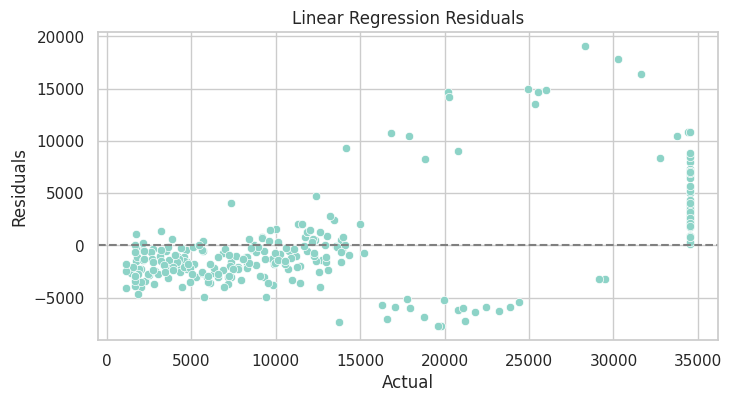

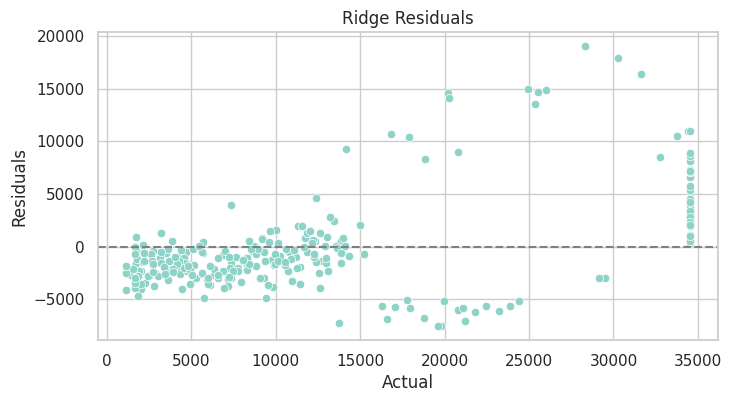

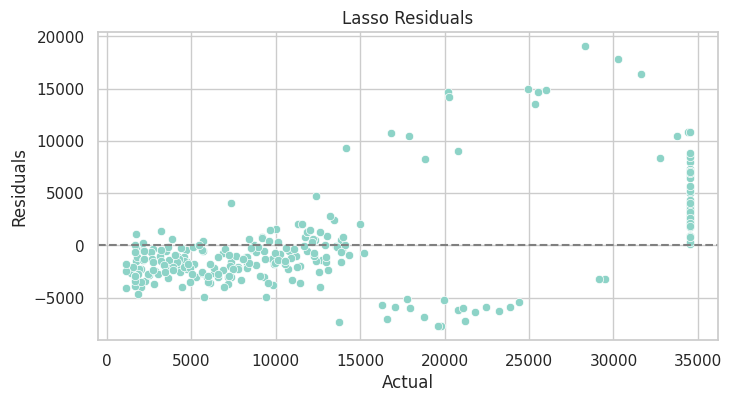

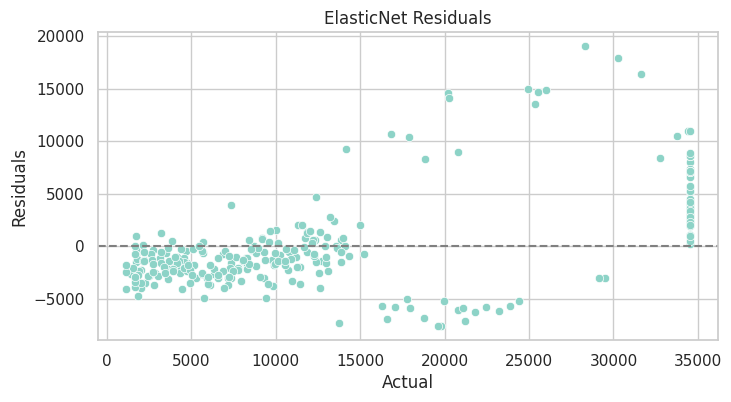

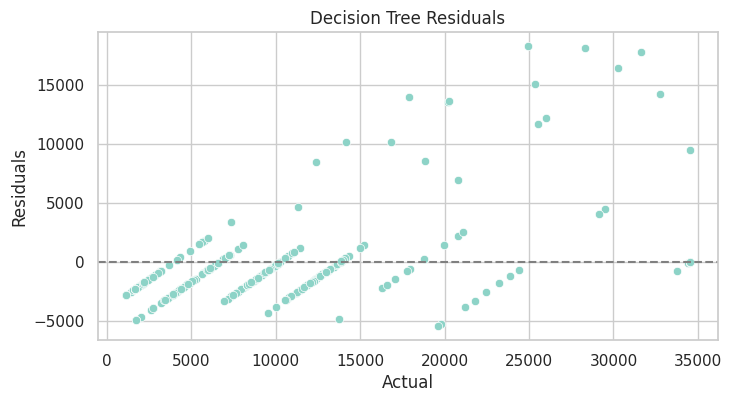

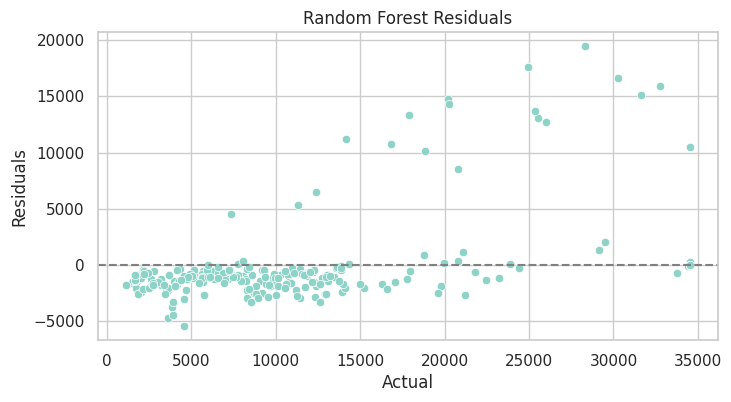

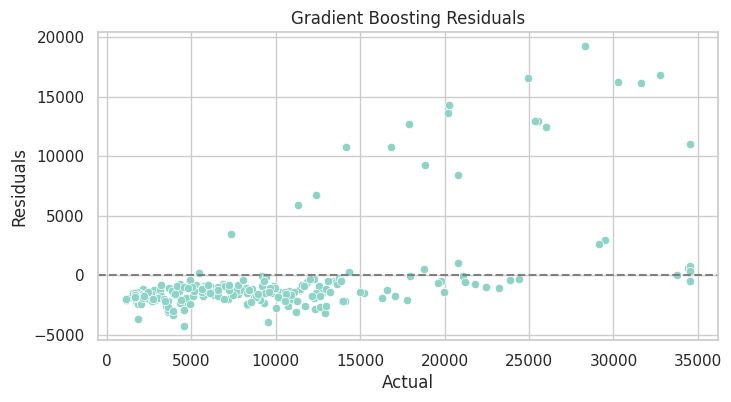

In [32]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=y_test, y=y_test - y_pred, color='#8dd3c7')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{name} Residuals', fontsize=12)
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.show()

## Feature Importance

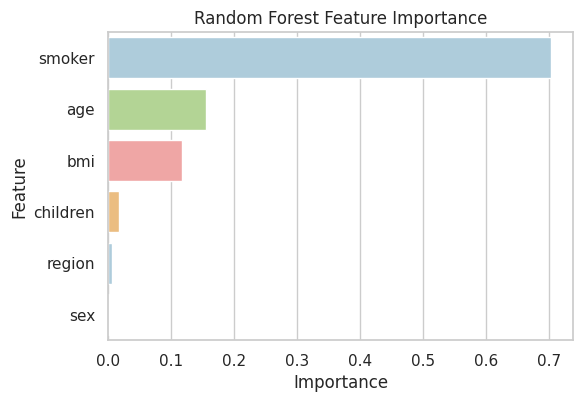

In [33]:
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_models['Random Forest'].named_steps['model'].feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette=colors)
plt.title("Random Forest Feature Importance", fontsize=12)
plt.show()

## Compare Before vs After Tuning

In [34]:
comparison = []
for name, (model, params) in models_params.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)]) if name in ['Linear Regression','Ridge','Lasso','ElasticNet'] else Pipeline([('model', model)])
    pipeline.fit(X_train, y_train)
    r2_default = r2_score(y_test, pipeline.predict(X_test))
    r2_tuned = r2_score(y_test, best_models[name].predict(X_test))
    comparison.append([name, r2_default, r2_tuned])

comparison_df = pd.DataFrame(comparison, columns=['Model','R2 Default','R2 Tuned']).sort_values('R2 Tuned', ascending=False)
print(comparison_df)


               Model  R2 Default  R2 Tuned
6  Gradient Boosting    0.871483  0.880946
5      Random Forest    0.849267  0.879737
4      Decision Tree    0.712332  0.873296
0  Linear Regression    0.820676  0.820676
2              Lasso    0.820647  0.820673
3         ElasticNet    0.700434  0.819806
1              Ridge    0.820563  0.819500


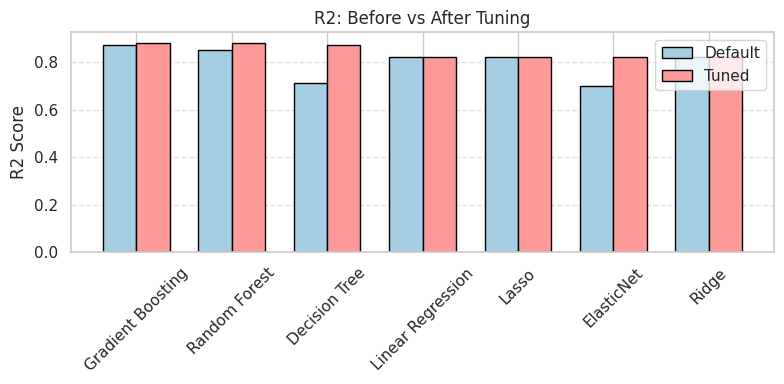

In [35]:
plt.figure(figsize=(8,4))
bar_width = 0.35
index = np.arange(len(comparison_df))
plt.bar(index, comparison_df['R2 Default'], bar_width, color='#a6cee3', edgecolor='black', label='Default')
plt.bar(index + bar_width, comparison_df['R2 Tuned'], bar_width, color='#fb9a99', edgecolor='black', label='Tuned')
plt.xticks(index + bar_width/2, comparison_df['Model'], rotation=45)
plt.ylabel('R2 Score')
plt.title('R2: Before vs After Tuning', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Pickle

In [36]:
pickle.dump(best_models['Random Forest'], open('medical_insurance_model.pkl','wb'))
print("Random Forest model saved as 'medical_insurance_model.pkl'")

Random Forest model saved as 'medical_insurance_model.pkl'
